# <center> Formation à la manipulation de données textuelles en Python </center>
## <center>  Jean-Philippe Magué (ENS de Lyon) - Julien Velin (Université Lumière Lyon 2) </center> 

# Analyse du lexique propre à chaque laboratoire

Dans cette 3ème partie, nous allons nous intéressé à la fréquence des lemmes dans les desciptifs de chaque laboratoire. Notre objectif est degager les termes propres à chacunn d'entre eux.

## Décompte du nombre d'occurrennces
Voici plusieurs manière de compter le nombre d'occurrences des mots d'un document

### Complètemenent à la main:

In [34]:
nOcc={}
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    for lemme in f:
        lemme=lemme.strip()
        if lemme not in nOcc:
            nOcc[lemme]=0
        nOcc[lemme]+=1

### Un peu moins à la main, en utilisant un [defaultdict](https://docs.python.org/fr/3/library/collections.html#collections.defaultdict)

In [36]:
from collections import defaultdict

In [37]:
nOcc=defaultdict(int)
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    for lemme in f:
        lemme=lemme.strip()
        nOcc[lemme]+=1

### Encore moins à la main, en utilisant un [Counter](https://docs.python.org/fr/3/library/collections.html#collections.Counter)

In [43]:
from collections import Counter

In [38]:
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    nOcc=Counter(f)
nOcc

In [41]:
lemmes=[]
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    for lemme in f:
        lemmes.append(lemme.strip())
nOcc=Counter(lemmes)

In [ ]:
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    nOcc=Counter([lemme.strip() for lemme in f])
nOcc

### Automatiquement, avec un [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) proposé par la bibliothèque [Scikit Learn](https://scikit-learn.org/stable/)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
counter=CountVectorizer()
with open('labos/IAO/lemmes.txt') as f:
    nOcc=counter.fit_transform([f.read()])

In [58]:
nOcc.toarray()

array([[ 1,  1,  1,  1,  1,  1,  2,  3,  1,  1,  2,  2,  1,  1,  3,  1,
         2,  1,  1,  2,  2,  1,  2,  1,  1,  1,  1,  4, 23,  1,  1,  2,
         2,  1,  2,  1,  1,  1,  1,  1, 14,  1,  2, 17,  1,  1,  2,  1,
         1,  2,  1,  1,  1,  3,  5,  1,  1,  1,  1,  2,  1,  1,  1,  2,
         1,  1,  2,  3, 13,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
         1,  1,  2,  4,  1,  1,  2,  1,  1,  1,  1,  6,  3,  1,  3,  1,
         1,  1,  1,  1,  1,  1,  5,  1,  1,  4,  1,  1,  1,  2,  1,  1,
        11,  1,  1,  2,  1,  2,  3]])

In [59]:
counter.get_feature_names_out()

array(['1992', '2002', '5062', 'accès', 'acquérir', 'activité', 'ainsi',
       'analyse', 'anthropologie', 'asean', 'asiatique', 'asie',
       'associer', 'atteindre', 'avec', 'avoir', 'base', 'campus', 'ce',
       'centre', 'chercheur', 'chine', 'chinois', 'cnrs', 'compétence',
       'conjoint', 'corée', 'dans', 'de', 'depuis', 'descartes',
       'différent', 'doctorant', 'documentation', 'domaine', 'donnée',
       'dont', 'droit', 'développer', 'ecole', 'en', 'entretien', 'est',
       'et', 'europe', 'excellence', 'expertise', 'fonder', 'formation',
       'fort', 'géographie', 'géographique', 'histoire', 'humain', 'iao',
       'iconographique', 'ii', 'iii', 'indonésien', 'information',
       'installer', 'institut', 'institution', 'interaction', 'iv',
       'japon', 'japonais', 'langue', 'le', 'linguistique', 'littérature',
       'lyon', 'matière', 'maîtrise', 'mission', 'monde', 'national',
       'normale', 'objectif', 'occidental', 'oriental', 'outre', 'par',
       'p

### Exercice 3.1
Construire un DataFrame qui donne pour chaque laboratoire le nombre de d'occurrences de chaque lemme

![](images/doc_term_mat.png)

In [60]:
import glob

In [63]:
fichiers = glob.glob('labos/*/lemmes.txt')

In [178]:
#Avec un simple dictionnaire:
nOcc={}
for fichier in fichiers:
    labo = fichier.split('/')[1]
    nOcc[labo]={}
    with open(fichier, encoding='utf8') as f:
        for lemme in f:
            lemme=lemme.strip()
            if lemme not in nOcc[labo]:
                nOcc[labo][lemme]=0
            nOcc[labo][lemme]+=1
nOcc=pd.DataFrame.from_dict(nOcc, orient='index').fillna(0)
nOcc.shape

(51, 3122)

In [122]:
#Avec un defaultdict:
nOcc={}
for fichier in fichiers:
    labo = fichier.split('/')[1]
    nOcc[labo]=defaultdict(int)
    with open(fichier, encoding='utf8') as f:
        for lemme in f:
            lemme=lemme.strip()
            nOcc[labo][lemme]+=1
nOcc=pd.DataFrame.from_dict(nOcc, orient='index').fillna(0)
nOcc.shape

(51, 3122)

In [123]:
#Avec un Counter:
nOcc={}
for fichier in fichiers:
    labo = fichier.split('/')[1]
    with open(fichier, encoding='utf8') as f:
        nOcc[labo]=Counter([lemme.strip() for lemme in f])
nOcc=pd.DataFrame.from_dict(nOcc, orient='index').fillna(0)
nOcc.shape

(51, 3122)

In [127]:
#Avec un CountVectorizer
documents=[]
nom_labos=[]
for fichier in fichiers:
    nom_labos.append(fichier.split('/')[1])
    with open(fichier, encoding='utf8') as f:
        documents.append(f.read())
counter=CountVectorizer()
nOcc=counter.fit_transform(documents)
nOcc=pd.DataFrame.sparse.from_spmatrix(nOcc,index=nom_labos,columns=counter.get_feature_names_out())
nOcc.shape

(51, 2958)

In [155]:
#Avec un CountVectorizer
documents=[]
nom_labos=[]
for fichier in fichiers:
    nom_labos.append(fichier.split('/')[1])
    with open(fichier, encoding='utf8') as f:
        documents.append(f.read())
counter=CountVectorizer(lowercase=False) #CountVectorizer transforme tout en miniscule par défaut
nOcc=counter.fit_transform(documents)
nOcc=pd.DataFrame.sparse.from_spmatrix(nOcc,index=nom_labos,columns=counter.get_feature_names_out())
nOcc.shape

(51, 3084)

In [175]:
#Avec un CountVectorizer
def tokenizer(s):
    return s.split('\n')

documents=[]
nom_labos=[]
for fichier in fichiers:
    nom_labos.append(fichier.split('/')[1])
    with open(fichier, encoding='utf8') as f:
        documents.append(f.read())
counter=CountVectorizer(lowercase=False,tokenizer=tokenizer) #On ne maîtrise pas bien la tokennisation de CountVectorizer !
nOcc=counter.fit_transform(documents)
nOcc=pd.DataFrame.sparse.from_spmatrix(nOcc,index=nom_labos,columns=counter.get_feature_names_out())
nOcc.shape

(51, 3124)

In [183]:
nOcc.index

Index(['LARHRA', 'RESHAPE', 'LVIS', 'IAO', 'CMW', 'FMRI', 'MARGE', 'ERIC',
       'EVS', 'MAGELLAN', 'ARCHEORIENT', 'GREPS', 'LIRIS', 'DDL', 'ARAR',
       'EDIEC', 'HISOMA', 'TRIANGLE', 'ELJ', 'LAET', 'CIHAM', 'IETT', 'DIPHE',
       'MAELYSE', 'GRAPHOS', 'CGN', 'CRPPC', 'EMC', 'CERCRID', 'ICAR', 'CERLA',
       'SAF', 'CERCOR', 'DCT', 'GATE', 'LCE', 'LER', 'S2HEP', 'EDPL', 'ELICO',
       'IRAA', 'IHRIM', 'PASSAGES', 'IRPHIL', 'LADEC', 'COACTIS', 'ISERL',
       'CEL', 'MOM', 'ECP', 'ECLLA'],
      dtype='object')

### Exercice 3.2
Quels sont les 10 lemmes les plus fréquents pour le laboratoire LAET ? Pour DIPHE? Pour CERCOR ?

In [187]:
nOcc.loc['LAET'].sort_values(ascending=False).head(10)

de    30.0
le    21.0
,     21.0
et    17.0
d’    14.0
      12.0
)      9.0
.      9.0
(      9.0
un     8.0
Name: LAET, dtype: float64

In [188]:
nOcc.loc['DIPHE'].sort_values(ascending=False).head(10)

de    59.0
,     47.0
le    32.0
      23.0
et    22.0
à     19.0
un    14.0
en    13.0
.     12.0
l’    11.0
Name: DIPHE, dtype: float64

In [186]:
nOcc.loc['CERCOR'].sort_values(ascending=False).head(10)

,      43.0
de     41.0
le     31.0
       22.0
et     20.0
.      17.0
l’     14.0
son    11.0
(      10.0
)      10.0
Name: CERCOR, dtype: float64

In [79]:
import spacy


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

# Ce qui est en dessous est encore très brouillon !

In [209]:
documents=[]
for labo in tqdm(labos):
    with open(f'{labo}/lemmes.txt') as f:
        documents.append(f.read())

  0%|          | 0/52 [00:00<?, ?it/s]

In [215]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(documents)
counts=pd.DataFrame.sparse.from_spmatrix(X, index=labos.keys(),columns=vectorizer.get_feature_names_out())

In [247]:
counts.sum().sort_values(ascending=False)[:10]

de             1818
le             1242
et              849
un              428
en              283
être            189
sur             179
recherche       175
dans            145
laboratoire     105
dtype: int64

In [251]:
vectorizer=TfidfVectorizer(stop_words=fr_stop)
X=vectorizer.fit_transform(documents)
tf_idf=pd.DataFrame.sparse.from_spmatrix(X, index=labos.keys(),columns=vectorizer.get_feature_names_out())

/Users/jmague/miniconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn(


In [253]:
tf_idf.sort_values('TRIANGLE', axis=1, ascending=False)

,politique,laboratoire,pensée,chantier,public,pôle,action,humanité,éducation,lien,...,engager,engendrer,english,englobe,enigma,enjeu,enjeux,enquête,enregistrement,œuvrer
ARAR,0.000000,0.129419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028755,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ARCHEORIENT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040281,...,0.000000,0.000000,0.000000,0.06213,0.000000,0.104122,0.000000,0.000000,0.000000,0.000000
CEL,0.033563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.072702,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CERCOR,0.000000,0.000000,0.000000,0.000000,0.000000,0.037359,0.000000,0.000000,0.000000,0.037359,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CERCRID,0.000000,0.000000,0.000000,0.139105,0.000000,0.000000,0.000000,0.114201,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CERLA,0.000000,0.000000,0.000000,0.000000,0.046884,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CGN,0.000000,0.038316,0.000000,0.000000,0.059046,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CIHAM,0.019259,0.040578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.041717,0.000000,0.025090,0.000000,0.000000,0.000000
CLHDPP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CMW,0.063668,0.044715,0.000000,0.000000,0.000000,0.044708,0.000000,0.000000,0.046607,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068956


In [8]:
import json

In [9]:
with open('labos.json', encoding='utf8') as f:
    labos = json.loads(f.read())

In [13]:
lemmes = []
for labo in labos:
    try:
        with open(f'labos/{labo}/lemmes.txt') as f:
            for lemme in f:
                lemmes.append(lemme.strip())
    except:
        continue

In [15]:
texte = ' '.join(lemmes)

In [26]:
fr_stop.add("l")
fr_stop.add("d")

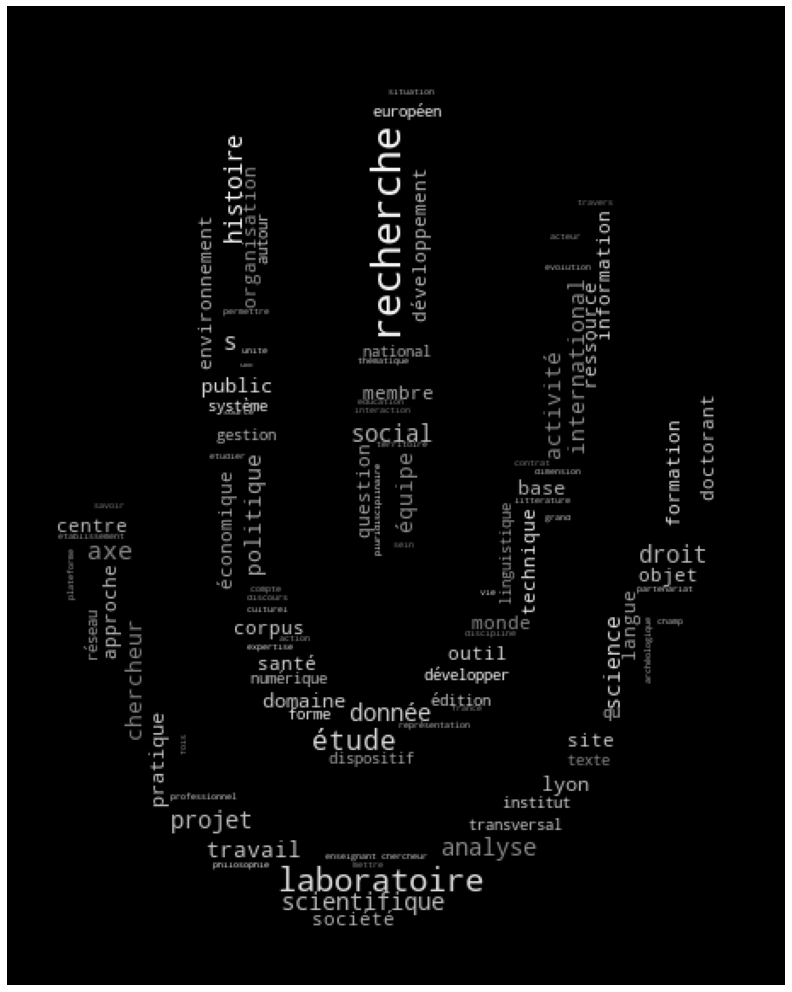

In [27]:
from wordcloud import WordCloud

# imread est nécessaire si on souhaite utiliser un masque (image en noir et blanc, le noir indiquant où afficher le nuage)
from imageio import imread

# nombre de mots à afficher
limit = 100

fontcolor='#fa0000' # couleur des caractères
bgcolor = '#000000' # couleur de fond
    
wordcloud = WordCloud(
    max_words=limit,
    stopwords= fr_stop, # liste de mots-outils
#    mask=imread('img/mask.png'),  # avec ou sans masque, à essayer ! (attention, nécessite un fichier de masque en noir et blanc)
    mask=imread('images/logo_msh.png'),  # avec ou sans masque, à essayer ! (attention, nécessite un fichier de masque en noir et blanc)    
    background_color=bgcolor,
#    font_path=font   # si on veut changer la police de caractères
).generate(texte.lower()) # tolower() permet de mettre tout le texte en minuscule

# cette première ligne est nécessaire pour afficher des graphiques dans le notebook
%matplotlib inline

import random
import matplotlib.pyplot as plt

fig = plt.figure()

# taille de la figure
fig.set_figwidth(14)
fig.set_figheight(18)

# si on souhaite mettre un titre
title = "Essai"

# cette fonction optionnelle permet de "customiser" l'affichage, cf. ci-dessous
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

#plt.imshow(wordcloud)     # le plus simple
plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))  # si on veut "customiser"
#plt.title(title, color=fontcolor, size=30, y=1.01)     # si on veut rajouter un titre
plt.axis('off')
plt.show()

In [19]:
wordcloud.words_

{'l': 1.0,
 'd': 0.7103064066852368,
 'recherche': 0.479108635097493,
 'laboratoire': 0.2924791086350975,
 'axe': 0.16991643454038996,
 'scientifique': 0.1532033426183844,
 'projet': 0.14484679665738162,
 'droit': 0.1392757660167131,
 'donnée': 0.13649025069637882,
 'social': 0.13370473537604458,
 'histoire': 0.1309192200557103,
 'politique': 0.11977715877437325,
 'activité': 0.116991643454039,
 'travail': 0.116991643454039,
 'chercheur': 0.11142061281337047,
 'science': 0.11142061281337047,
 'international': 0.11142061281337047,
 's': 0.10584958217270195,
 'étude': 0.10027855153203342,
 'pratique': 0.09749303621169916,
 'public': 0.09749303621169916,
 'lyon': 0.0947075208913649,
 'domaine': 0.0947075208913649,
 'base': 0.09192200557103064,
 'centre': 0.08356545961002786,
 'santé': 0.08356545961002786,
 'développement': 0.0807799442896936,
 'formation': 0.0807799442896936,
 'monde': 0.07799442896935933,
 'langue': 0.07520891364902507,
 'organisation': 0.07242339832869081,
 'objet': 0.0

In [21]:
Counter(lemmes)

Counter({'le': 1242,
         'laboratoire': 102,
         'arar': 3,
         'être': 189,
         'naître': 4,
         'en': 281,
         '2000': 1,
         'de': 1816,
         'l’': 444,
         'union': 1,
         'deux': 24,
         'd’': 305,
         'archéométrie': 3,
         ':': 134,
         'céramologie': 3,
         'Lyon': 58,
         ',': 1209,
         'créer': 7,
         '1967': 1,
         'par': 94,
         'maurice': 1,
         'Picon': 1,
         'et': 849,
         'centre': 33,
         'datation': 8,
         'Radiocarbone': 1,
         'fonder': 5,
         'Jacques': 1,
         'Evin': 1,
         '1965': 1,
         '.': 493,
         'très': 12,
         'vite': 1,
         'il': 64,
         'intégrer': 1,
         'enseignant': 17,
         '-': 114,
         'chercheur': 55,
         'université': 28,
         'Lumière': 3,
         '2': 22,
         'devenir': 3,
         'un': 428,
         'unité': 16,
         'Mixte': 1,
         'Rech